In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('prediction.csv')

if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678
1,2,3,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682
2,2,3,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632
3,1,3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412
4,2,3,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718


In [8]:
X = df.drop(columns=["Channel", "Region"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)


print("Cluster centers (scaled):\n", kmeans.cluster_centers_)
print("\nCluster counts:\n", df["Cluster"].value_counts())

Cluster centers (scaled):
 [[-1.18027304  0.47742041  0.67842477 -1.13891718  0.78333866 -0.70111899]
 [ 0.40755315  0.79872357  0.73763041  0.2958208   0.66301753  0.68242358]
 [ 0.16202596 -0.73054459 -0.7638763   0.22360431 -0.75178719 -0.20763731]]

Cluster counts:
 Cluster
2    213
1    147
0     80
Name: count, dtype: int64


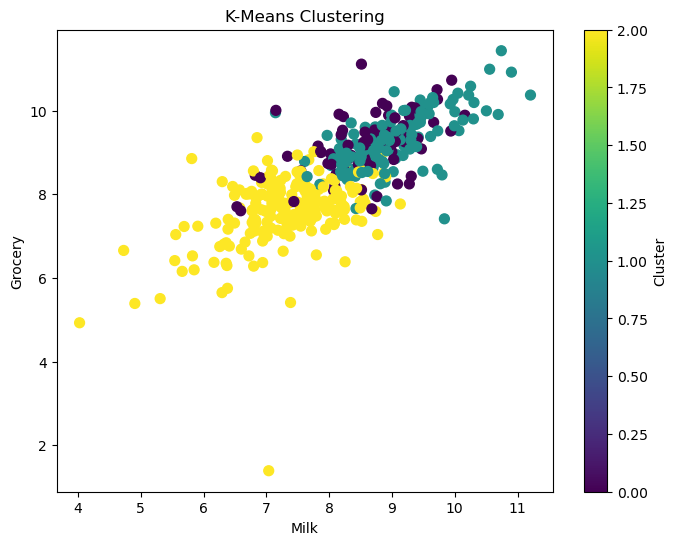

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Milk"], df["Grocery"], c=df["Cluster"], cmap="viridis", s=50)
plt.xlabel("Milk")
plt.ylabel("Grocery")
plt.title("K-Means Clustering")
plt.colorbar(label="Cluster")
plt.show()

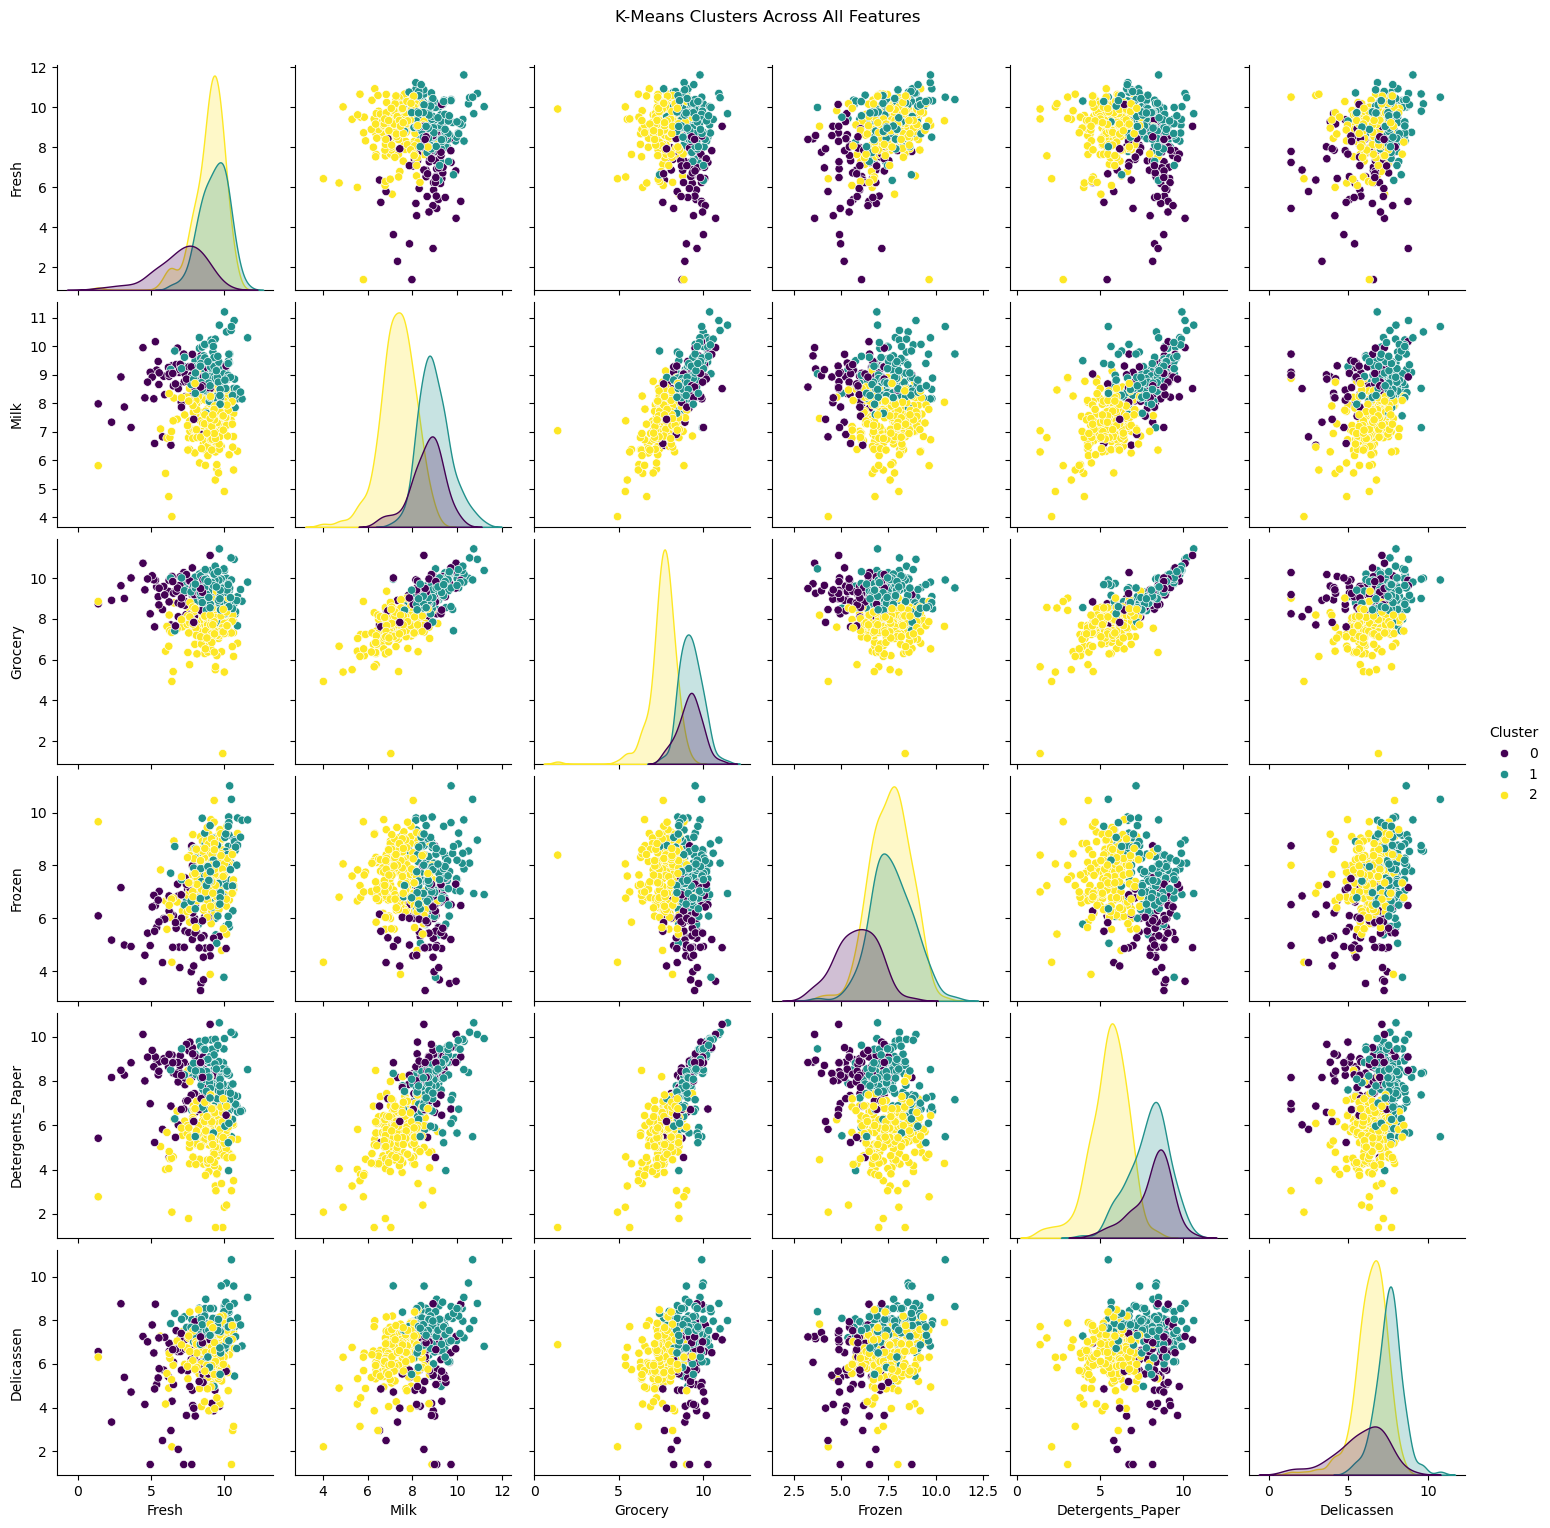

In [17]:
import seaborn as sns
features = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

sns.pairplot(df[features + ["Cluster"]], hue="Cluster", palette="viridis")
plt.suptitle("K-Means Clusters Across All Features", y=1.02)
plt.show()

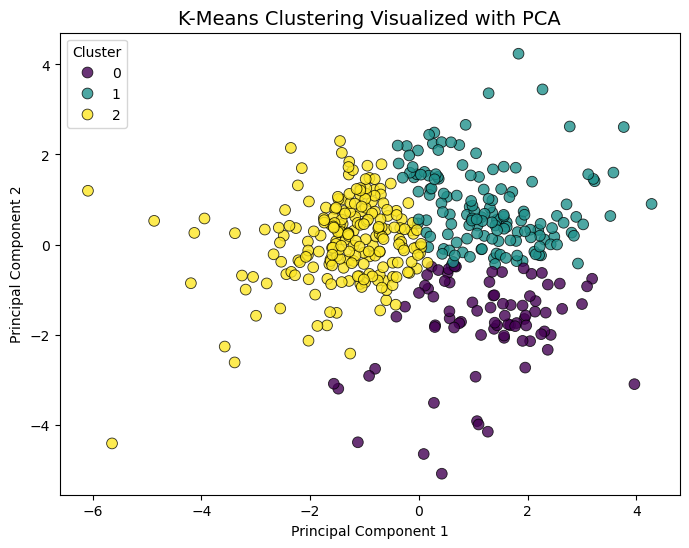

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PCA1", 
    y="PCA2", 
    hue="Cluster", 
    data=df, 
    palette="viridis", 
    s=60, 
    alpha=0.8,
    edgecolor="k"
)

plt.title("K-Means Clustering Visualized with PCA", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


In [20]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,PCA1,PCA2
0,2,3,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678,1,1.380383,-0.304727
1,2,3,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682,1,1.438870,0.537468
2,2,3,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632,1,1.513453,1.232565
3,1,3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412,2,-0.825105,1.210790
4,2,3,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718,1,0.802897,1.766046


In [23]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, df["Cluster"])
print(f"Silhouette Score for k=3: {score:.3f}")

Silhouette Score for k=3: 0.259
